## Cosmetics Brand Analysis
<p>The cosmetics industry is a 50 billion-dollar-a-year business in the US alone. Cosmetics sales are even used as an indicator for economic recessions (i.e., the "lipstick index").</p>
<p>You are working for a cosmetics start-up that plans to launch a new line of organic products. The launch will focus on the following cosmetics categories: fragrances, makeup, and skincare. Your task is to find the average prices for four competitor brands across these three categories. </p>
<p>You will be using data collected from Sephora's global store in your analysis. However, there are some additional requirements before you can present the results:</p>
<ul>
<li>The data available is unprocessed as received from Sephora. The start-up requests the categories as follows:</li>
</ul>
<table>
<thead>
<tr>
<th>New category</th>
<th style="text-align:left;">Existing categories to reclassify</th>
</tr>
</thead>
<tbody>
<tr>
<td>Fragrance</td>
<td style="text-align:left;">Perfume, Cologne</td>
</tr>
<tr>
<td>Makeup</td>
<td style="text-align:left;">Eye Palettes, Lipstick, Highlighter, Foundation, Mascara, Eyeliner, Makeup, Eyeshadow</td>
</tr>
<tr>
<td>Skincare</td>
<td style="text-align:left;">Moisturizers, Face Serums, Face Wash &amp; Cleansers, Face Masks, Face Primer, Body Lotions &amp; Body Oils,  Lotions &amp; Oils</td>
</tr>
</tbody>
</table>
<ul>
<li><p>Currently, it is unclear who the primary competitors are. Find the top four brands by the combined number of fragrance, makeup, and skincare products produced.</p></li>
<li><p>Exclude any products containing the toxic ingredient "toluene" from your analysis. Assume products with no ingredient information do not contain "toluene".</p></li>
<li><p>Product prices should be compared in USD. Below are the conversions for currencies found in the dataset:</p>
<ul>
<li>1 EUR = 1.22 USD</li>
<li>1 GBP = 1.42 USD</li>
<li>1 Yen = 0.01 USD</li></ul></li>
</ul>
<hr>
<p><em>The datasets available are listed below:</em></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/cosmetics.csv - Catalogue of cosmetics products, including brand, category, price, and other characteristics</b>
    </div>
    <div>Source: <a href="https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1">Kaggle</a></div>
<ul>
    <li><b>id: </b>The product id.</li>
    <li><b>brand: </b>The brand.</li>
    <li><b>category: </b>The category of product.</li>
    <li><b>name: </b>The name of the product.</li>
    <li><b>size: </b>The size of the product.</li>
    <li><b>price: </b>The price of the product (in various currencies).</li>
    <li><b>rating: </b>The consumer rating of the product.</li>
    <li><b>how_to_use: </b>Instructions for the product.</li>
    <li><b>online_only: </b>Whether or not the product is online-exclusive.</li>
    <li><b>limited_edition: </b>Whether or not the product is limited edition.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/ingredients.txt - A tab-delimited file containing the product IDs and ingredients for products in the cosmetics dataset</b>
    </div>
    <div>Source: <a href="https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1">Kaggle</a></div>
<ul>
    <li><b>product_id: </b>The product id (corresponding to the id column in the cosmetics dataset).</li>
    <li><b>ingredients: </b>The list of ingredients in the product.</li> 
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/cosmetics_categories.csv - Table containing the sub and broad categories for recategorization</b>
    </div>
<ul>
    <li><b>sub_category: </b>The sub categories that exist in the cosmetics CSV that need to be recategorized.</li>
    <li><b>broad_category: </b>The corresponding broader category to which the sub_category belongs to and needs to be recategorized as.</li> 
</ul>
    </div>

In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv1 = 'datasets/cosmetics.csv'
txt = 'datasets/ingredients.txt'
csv2 = 'datasets/cosmetics_categories.csv'




In [2]:
cosmetics = pd.read_csv(csv1)
ingredients = pd.read_csv(txt, sep = '\t')
categories = pd.read_csv(csv2)

In [3]:

display(ingredients.head())
display(cosmetics.head())
display(categories.head())

,product_id,ingredients
0,2218774,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,2044816,unknown
2,1417567,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,1417617,unknown
4,2218766,Colonia: Alcohol Denat.- Water- Fragrance- Lim...


,id,brand,category,name,size,price,rating,how_to_use,online_only,limited_edition
0,2218774,Acqua Di Parma,Perfume,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,USD 66,4.0,Suggested Usage:-Fragrance is intensified by t...,1,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,USD 66,4.5,no instructions,1,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,USD 180,4.5,no instructions,1,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,USD 120,4.5,no instructions,1,0
4,2218766,Acqua Di Parma,Perfume,Colonia Miniature Set,5 x 0.16oz/5mL,USD 72,3.5,Suggested Usage:-Fragrance is intensified by t...,1,0


,sub_category,broad_category
0,Cologne,Fragrance
1,Perfume,Fragrance
2,Eye Palettes,Makeup
3,Lipstick,Makeup
4,Highlighter,Makeup


#  Cosmetics table cleaning

What we need to do is remove the letters in the price first and then convert it to USD with appropriate units, we need to convert it to float aftewards and then round to two decimal places.

We will filter the cosmetics columns to only show id, category, brand, and price since these are the only relevant columns

In [4]:
#Let's clean the cosmetics table first
cosmetics = cosmetics[['id','brand', 'category', 'price']]
cosmetics.dtypes

id           int64
brand       object
category    object
price       object
dtype: object

# Joining the three tables using inner join

First, we need to rename the sub_category to category to perform the inner join

In [5]:
categories.rename(columns = {"sub_category": "category"}, inplace = True )
categories.head()

,category,broad_category
0,Cologne,Fragrance
1,Perfume,Fragrance
2,Eye Palettes,Makeup
3,Lipstick,Makeup
4,Highlighter,Makeup


We then rename the product_id column on the ingredients table to match the id column of the cosmetics table

In [6]:
ingredients.rename(columns = {"product_id": "id"}, inplace = True)

In [7]:
merged = pd.merge(cosmetics, categories, on = 'category', how = 'inner')
merged = pd.merge(merged, ingredients, on = 'id', how = 'inner')
merged.head()

,id,brand,category,price,broad_category,ingredients
0,2218774,Acqua Di Parma,Perfume,USD 66,Fragrance,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,1417567,Acqua Di Parma,Perfume,USD 180,Fragrance,Alcohol Denat.- Water- Fragrance- Limonene- Li...
2,1417617,Acqua Di Parma,Perfume,USD 120,Fragrance,unknown
3,2218766,Acqua Di Parma,Perfume,USD 72,Fragrance,Colonia: Alcohol Denat.- Water- Fragrance- Lim...
4,1417609,Acqua Di Parma,Perfume,USD 180,Fragrance,unknown


In [8]:
merged['brand'].value_counts()

SEPHORA COLLECTION    93
CLINIQUE              83
Dior                  78
TOM FORD              75
Lancôme               57
                      ..
it cosmetics           1
kenzoki                1
Lab Series For Men     1
bvlgari                1
CAUDALIE               1
Name: brand, Length: 521, dtype: int64

We can see that they having different casings for different brands. Alright, now we need to change the casing of the brand to lowercase so that they will all be in uniform casing.

In [9]:
merged['brand'] = merged['brand'].str.lower()
merged['ingredients'] = merged['ingredients'].str.lower()
merged['brand'].value_counts()

sephora collection     119
clinique               112
tom ford               103
dior                    94
lancôme                 73
                      ... 
seed phytonutrients      1
st. tropez               1
briogeo                  1
lab series for men       1
sephora favorites        1
Name: brand, Length: 174, dtype: int64

## Removing products containing the toxic ingredient "toluene".

In [10]:
i = 0
for ingredient in merged['ingredients']:
    if 'toluene' in ingredient :
        merged.drop(i, inplace = True)
    i+=1

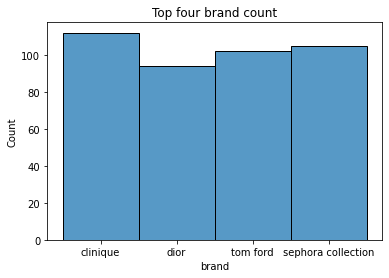

In [11]:
#Since Sephora Collection, clinique, dior, 
#and tom ford are the top four brands, 
#we will update the data frame to filter only that
merged = merged[(merged['brand'] == 'sephora collection') | 
                      (merged['brand'] == 'clinique') | 
                (merged['brand'] =='dior') | (merged['brand'] == 'tom ford')]
sns.histplot(merged['brand'])
plt.title("Top four brand count")
plt.show()

## Change Price column to only include numbers and convert other currencies to USDs 

In [12]:

i = 0
for row in merged['price']:
    if row.startswith('USD'):
        merged.iloc[i,3] = float(row.replace("USD", "").strip()) 
    elif row.startswith('GBP'):
        merged.iloc[i,3] = round(float(row.replace("GBP", "").strip()) * 1.42,2)
        print(cosmetics.iloc[i,3])
    elif row.startswith('YEN'):
        merged.iloc[i,3] = round(float(row.replace("YEN", "").strip()) * 0.01,2)
    else:
        merged.iloc[i,3] = round(float(row.replace("EUR", "").strip()) * 1.22,2)
    i+=1
merged['price'] = merged['price'].astype('float64')


## Creation of the new dataframe

We first initialize the dictionary for our dataframe. Then, we create 4 temporary dictionaries to count the units of each category 

In [13]:
new_dict = {'clinique':{'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0},
             'dior':{'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0},
            'sephora collection':{'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0},
             'tom ford':{'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0}}
clinique_dict = {'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0}
dior_dict = {'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0}
sephora_dict = {'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0}
tom_dict = {'Fragrance': 0 , 'Makeup': 0 , 'Skincare' : 0}

In [14]:
i = 0
for row in merged['brand']:
    for keys in new_dict.keys():
        if row == keys:
            for k,v in new_dict[keys].items():
                if merged.iloc[i,4] == k:
                    new_dict[row][k] += merged.iloc[i,3]
                    if row == 'clinique':
                        clinique_dict[merged.iloc[i,4]] +=1
                    elif row == 'dior':
                        dior_dict[merged.iloc[i,4]] +=1
                    elif row == 'sephora collection':
                        sephora_dict[merged.iloc[i,4]] +=1
                    else:
                        tom_dict[merged.iloc[i,4]] +=1
                        
    i+=1
#We then get the average
for keys in new_dict.keys():
    if keys == 'clinique':
            for k,v in new_dict[keys].items():
                new_dict[keys][k] = round(float(new_dict[keys][k]/clinique_dict[k]),2)
    elif keys == 'dior':
            for k,v in new_dict[keys].items():
                new_dict[keys][k] = round(float(new_dict[keys][k]/dior_dict[k]),2)
            
    elif keys == 'sephora collection':
           for k,v in new_dict[keys].items():
                new_dict[keys][k] = round(float(new_dict[keys][k]/sephora_dict[k]),2)
    else:
            for k,v in new_dict[keys].items():
                new_dict[keys][k] = round(float(new_dict[keys][k]/tom_dict[k]),2)

In [15]:
brand_prices = pd.DataFrame.from_dict(new_dict).transpose()
brand_prices

,Fragrance,Makeup,Skincare
clinique,58.00,24.08,36.90
dior,92.85,39.12,88.08
sephora collection,17.00,16.83,10.04
tom ford,182.70,61.35,74.86


All done!
